In [1]:
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage
from langgraph.graph import add_messages, StateGraph, END
from langchain_groq import ChatGroq

In [2]:
class State(TypedDict): 
    messages: Annotated[list, add_messages]

In [3]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [4]:
GENERATE_POST = "generate_post"
GET_REVIEW_DECISION = "get_review_decision"
POST = "post"
COLLECT_FEEDBACK = "collect_feedback"

In [5]:
def generate_post(state: State): 
    return {
        "messages": [llm.invoke(state["messages"])]
    }

In [6]:
def get_review_decision(state: State):  
    post_content = state["messages"][-1].content 
    
    print("\n📢 Current LinkedIn Post:\n")
    print(post_content)
    print("\n")

    decision = input("Post to LinkedIn? (yes/no): ")

    if decision.lower() == "yes":
        return POST
    else:
        return COLLECT_FEEDBACK

In [7]:
def post(state: State):  
    final_post = state["messages"][-1].content  
    print("\n📢 Final LinkedIn Post:\n")
    print(final_post)
    print("\n✅ Post has been approved and is now live on LinkedIn!")

In [8]:
def collect_feedback(state: State):  
    feedback = input("How can I improve this post?")
    return {
        "messages": [HumanMessage(content=feedback)]
    }

In [16]:
graph = StateGraph(State)

graph.add_node(GENERATE_POST, generate_post)
graph.add_node(COLLECT_FEEDBACK, collect_feedback)
graph.add_node(POST, post)

graph.set_entry_point(GENERATE_POST)

graph.add_conditional_edges(GENERATE_POST, get_review_decision,{
    POST:POST,
    COLLECT_FEEDBACK:COLLECT_FEEDBACK
})
graph.add_edge(POST, END)
graph.add_edge(COLLECT_FEEDBACK, GENERATE_POST)

app = graph.compile()

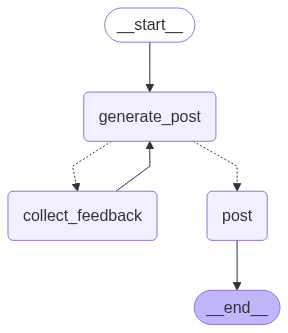

In [17]:
app

In [18]:
response = app.invoke({
    "messages": [HumanMessage(content="Write me a LinkedIn post on AI Agents taking over content creation")]
})

print(response)


📢 Current LinkedIn Post:

**The Future of Content Creation: AI Agents Take Center Stage**

As we continue to push the boundaries of technology, the lines between human creativity and artificial intelligence are becoming increasingly blurred. The rise of AI agents in content creation is a trend that's hard to ignore, and it's raising more questions than answers.

With the ability to generate high-quality content at unprecedented speeds, AI agents are revolutionizing the way we approach content creation. From blog posts and social media updates to videos and podcasts, the possibilities are endless. But what does this mean for human content creators?

**The Pros:**

- **Increased Efficiency:** AI agents can produce content in a fraction of the time it takes humans, freeing up time for more strategic and high-level tasks.
- **Scalability:** AI agents can handle large volumes of content, making them ideal for businesses with a high volume of content to produce.
- **Consistency:** AI agents